In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [2]:
#svm_clf=Pipeline([("scaler",StandardScaler()),
                 #("linear_svm",LinearSVC(C=1,loss="hinge"))])
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X.astype(np.float64))
svm_clf=LinearSVC(C=1,loss="hinge")
svm_clf.fit(X_scaled,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [3]:
svm_clf.predict([[5.5,1.7]])

array([ 1.])

In [4]:
X[:,0][y==1].shape

(50,)

In [5]:
svm_clf.coef_[0]

array([ 1.63740226,  2.38655914])

then we can plot the SVM and see what is like

In [6]:
from sklearn.svm import SVC
svm_clf=SVC(kernel="linear",C=1000) # do not use the linearSVC,because it has no attribute support_vectors
svm_clf.fit(X_scaled,y)

def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w=svm_clf.coef_[0]
    b=svm_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0=np.linspace(xmin,xmax,200)
    decision_boundary=-w[0]/w[1]*x0-b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs=svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1], s=200, facecolors='#FFAAAA') #s=size in points
    plt.plot(x0,decision_boundary,"k-",linewidth=2)
    plt.plot(x0,gutter_up,"k--",linewidth=2)
    plt.plot(x0,gutter_down,"k--",linewidth=2)
    
    

In [7]:
svm_clf.support_vectors_[:,0]

array([ 0.64902723,  0.53529583,  0.59216153,  0.64902723,  0.70589294,
        0.76275864,  0.42156442,  0.70589294,  0.59216153,  0.76275864,
        1.04708716,  0.59216153])

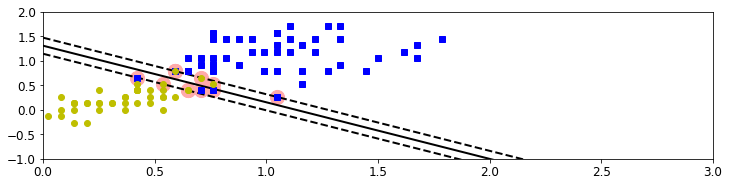

In [8]:
plt.figure(figsize=(12,2.7))
plot_svm_decision_boundary(svm_clf,0,5.5)
plt.plot(X_scaled[:,0][y==1],X_scaled[:,1][y==1],"bs")
plt.plot(X_scaled[:,0][y==0],X_scaled[:,1][y==0],"yo")
plt.axis([0,3,-1,2])
plt.show()


## Nonlinear SVM Classification

In [9]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_feature.fit_transform(X1D)
#X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
X_poly.shape

(9, 2)

In [10]:
svm_clf.fit(X_poly,y)
X_poly.shape

(9, 2)

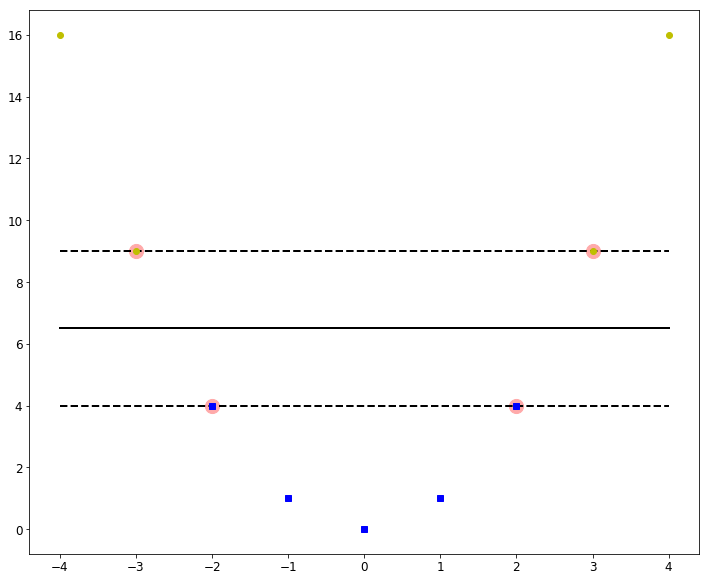

In [11]:
plt.figure(figsize=(12,10))
plot_svm_decision_boundary(svm_clf,-4,4)
plt.plot(X_poly[:,0][y==0],X_poly[:,1][y==0],"yo")
plt.plot(X_poly[:,0][y==1],X_poly[:,1][y==1],"bs")
plt.show()

it has been perfectly divided

let's try some more complex polynominal model

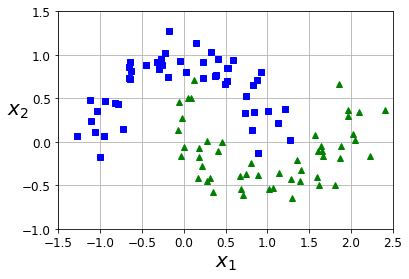

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

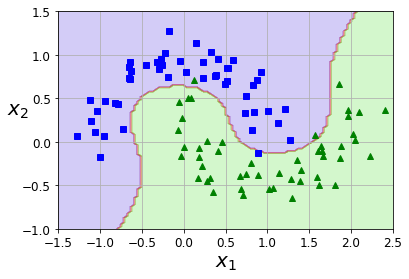

In [14]:
def poly_predict(clf,axes):
    x0=np.linspace(axes[0],axes[1],100)
    x1=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0,x1)
    X1=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X1).reshape(x0.shape)#predict classes labels
    #The confidence score for a sample is the signed distance of that sample to the hyperplane.
    y_decision=clf.decision_function(X1).reshape(x0.shape) #predict confident scores
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.2)

poly_predict(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])



In [15]:
from sklearn.svm import SVC

poly_svm_clf=Pipeline([("scaler",StandardScaler()),
                      ("poly classifier",SVC(kernel="poly",degree=3,coef0=1,C=5))])

poly_svm_clf.fit(X,y)

poly100_svm_clf=Pipeline([("scaler",StandardScaler()),
                      ("poly classifier",SVC(kernel="poly",degree=10,coef0=1,C=5))])

poly100_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly classifier', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

coef0 controls how much the model is influenced by highdegree
polynomials versus low-degree polynomials

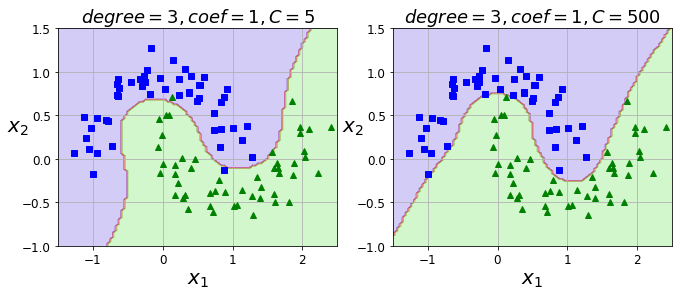

In [16]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
poly_predict(poly_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=1,C=5$",fontsize=18)

plt.subplot(122)
poly_predict(poly100_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=1,C=500$",fontsize=18)
plt.show()

so we can see that increasing C leads to overfitting

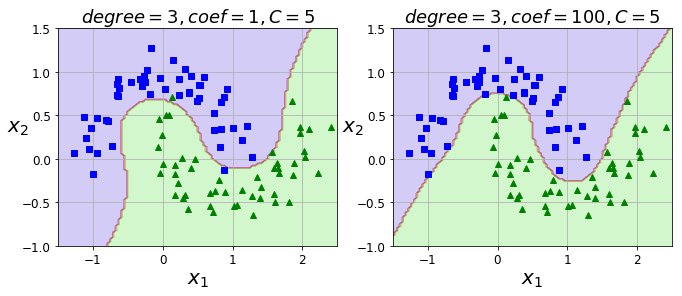

In [17]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
poly_predict(poly_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=1,C=5$",fontsize=18)

plt.subplot(122)
poly_predict(poly100_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=100,C=5$",fontsize=18)
plt.show()

only add the coef didn't see much , only a little bit underfitting

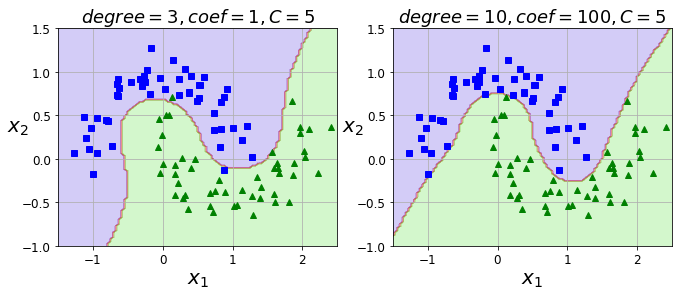

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
poly_predict(poly_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=1,C=5$",fontsize=18)

plt.subplot(122)
poly_predict(poly100_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=10,coef=100,C=5$",fontsize=18)
plt.show()

Obviously degree = 10 is overfitting

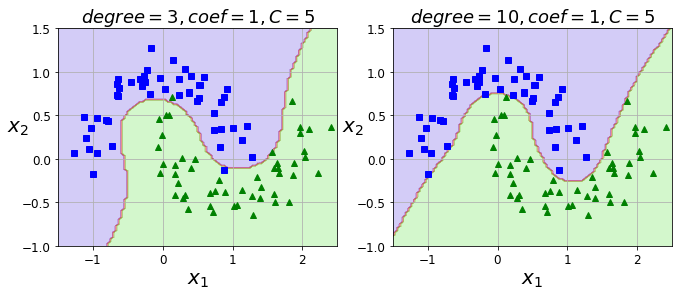

In [19]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
poly_predict(poly_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=3,coef=1,C=5$",fontsize=18)

plt.subplot(122)
poly_predict(poly100_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$degree=10,coef=1,C=5$",fontsize=18)
plt.show()

but only increase the degree value leads to underfitting

in order to illustrate the similarity, use gaussian RBF $\phi=exp(-\gamma||x-l||^2)$

[-4.5, 4.5, -0.1, 1.1]

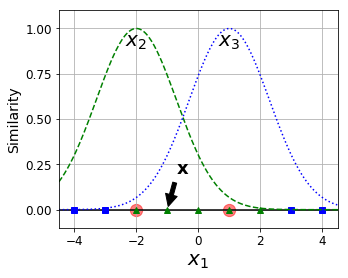

In [20]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)
gamma=0.3
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k') #画出直线
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

now we use gaussian kernel instead of polynominal kernel in the classifier